定义新命令
$$
\def\R{\mathbb{R}}
\def\C{\mathbb{C}}
\def\d#1{\mathrm{d}#1}
\def\bm#1{\boldsymbol#1}
$$

Hilbert变换是一个典型的全局方法。希尔伯特变换是一个积分变换（和Laplace、Fourier一样），它是为了解决数学物理中一个特殊条件下的积分方程而被引入。
$$
H(x(t)) = \tilde{x}(t) = \frac{1}{\pi} \int_{-\infty}^\infty \frac{x(\tau)}{t - \tau} \d{\tau}
$$
根据卷积定义，$h(t) = \frac{1}{\pi t}$为理想Hilbert变换的冲激响应
$$
y(t) = x(t) * h(t) = \int_{-\infty}^\infty x(\tau) h(t - \tau) \d{\tau} = \int_{-\infty}^\infty x(\tau) \frac{1}{\pi (t - \tau)} \d{\tau} = \frac{1}{\pi} \int_{-\infty}^\infty \frac{x(\tau)}{t - \tau} \d{\tau}
$$
性质：
- HT变换后，幅值不变，相位平移了$-\frac{\pi}{2}$
- 原信号和HT信号正交
- 四次变换后和原信号相同，信号能量不变
- 如果原始信号是实函数，它的HT也是实函数、此外HT是一个线性变换

例子：$x(t) = \sin(t)$
$$
\tilde{x}(t) = \frac{1}{\pi} \int_{-\infty}^\infty \frac{x(\tau)}{t - \tau} \d{\tau} = \frac{1}{\pi} \int_{-\infty}^\infty \frac{\sin(\tau)}{t - \tau} \d{\tau} = \cos(t)
$$

解析信号包络$A(t)$，旋转相位为$\phi(t)$，其实数轴投影的信号表示为$x(t) = A(t) \cos(\phi(t))$，解析信号表达如下：
$$
X(t) = |X(t)| [\cos(\phi(t)) + j\sin(\phi(t))] = A(t) e^{j\phi(t)} \\
\ln(X(t)) = \ln(A(t)) + j\phi(t)
$$
信号的瞬时幅度（包络）$A(t)$和瞬时相位$\phi(t)$
$$
A(t) = \pm|X(t)| = \sqrt{x^2(t) + \tilde{x}^2(t)} = e^{\mathcal{Re}[\ln(X(t))]} \\
\phi(t) = \mathcal{arctan}\frac{\tilde{x}(t)}{x(t)} = \mathcal{Im}[\ln(X(t))]
$$
实现坐标变换$(x, \tilde{x}) \rightarrow (A, \phi)$
$$
x(t) = A(t) \cos(\phi(t)), \tilde{x}(t) = A(t) \sin(\phi(t))
$$
Gabor和Ville定义过解析信号的瞬时频率（IF）：瞬时相位时间函数的一阶导数定义为瞬时频率$w(t) = \phi^{'}(t)$
- 直接求导
$$
\phi^{'}(t) = (\mathcal{arctan}\frac{\tilde{x}(t)}{x(t)})^{'} = \frac{1}{1 + (\frac{\tilde{x}(t)}{x(t)})^2} (\frac{\tilde{x}(t)}{x(t)})^{'} = \frac{1}{1 + (\frac{\tilde{x}(t)}{x(t)})^2} \frac{x(t)\tilde{x}^{'}(t) - x^{'}(t) \tilde{x}(t)}{x^2(t)} = \frac{x(t)\tilde{x}^{'}(t) - x^{'}(t) \tilde{x}(t)}{x^2(t) + \tilde{x}^2(t)} = \frac{x(t)\tilde{x}^{'}(t) - x^{'}(t) \tilde{x}(t)}{A^2(t)}
$$
- 对于数字化采样后的信号，利用相位函数的差分（一阶导数）求解瞬时频率
$$
X^{'}(t) = A^{'}(t) e^{j\phi(t)} + A(t) e^{j \phi(t)} j\phi^{'}(t), \quad \frac{X^{'}(t)}{X(t)} = \frac{A^{'}(t)}{A(t)} + j\phi^{'}(t), \quad \phi^{'}(t) = \mathcal{Im}(\frac{X^{'}(t)}{X(t)})
$$
- 对于数字化采样后的信号，利用如下公式求解：
$$
\Delta \phi_n = \phi_{n+1} - \phi_n = \mathcal{arctan}(\frac{\tilde{x}_{n+1}}{x_{n+1}}) - \mathcal{arctan}(\frac{\tilde{x}_n}{x_n}) = -\mathcal{angle}(X_n X_{n+1}^{*}) \\
X_n X_{n+1}^{*} = A_n e^{j\phi_n} A_(n+1) e^{-j\phi_{n+1}} = A_n A_{n+1} e^{j(\phi_n - \phi_{n+1})}
$$ 

用Hilbert变换解决瞬时频率问题：信号模型中的瞬时频率在每一个信号采样点上都可以得到一个值，而这样的方法得到的瞬时频率值比通过峰峰值或是过零点的区间长度估计瞬时频率要更加的多
$$
x(t) = A(t) \cos(\phi(t)) = A(t) \cos(\int_0^t \phi^{'}(\tau) \d{\tau}) = A(t) \cos(\int_0^t w(\tau) \d{\tau})
$$
- Hilbert变换最佳应用场景为窄带信号的原因：通过一个矩形滤波器的随机信号出现负频率的概率和滤波器宽度的正比关系为$p(w(t)<0) = \frac{(\Delta w)^2}{144 w_0^2}$,其中$w_0$为滤波器中心频率，$\Delta w$为滤波器带宽，这表明通过任意窄带滤波器后的随机信号任然有负的IF值，如果带宽比$\frac{\Delta w}{w_0} \le 0.01$，这时出现负的IF值概率达到比百万分之一还小，这时可以认为IF值总是正的。
- 时间域中看看有负值瞬时频率的测量信号
  - 复杂时变信号的瞬时幅度和瞬时频率都不是一个常数，它们总是随着时间变化。
  - IF是一个正值函数，则信号本身有同样多的过零点和极值点。
  - IF有负值，则信号在相继的过零点间有多个极值。

### 单频率跟踪（SFT）
成本函数
$$
J() = E(|y[n] - y^{*}[n]|^2) = E(|y[n] - e^{jw[n+1]}y[n-1]|^2)
$$

系统的冲击响应$h(t) = \frac{1}{\pi t}$，其傅里叶变换为
$$
H(jw) = \int_{-\infty}^\infty h(t) e^{-jwt} \d{t} = \int_{-\infty}^\infty \frac{1}{\pi t} e^{-jwt} \d{t} = \frac{1}{\pi} \int_{-\infty}^\infty \frac{1}{t} e^{-jwt} \d{t}
$$

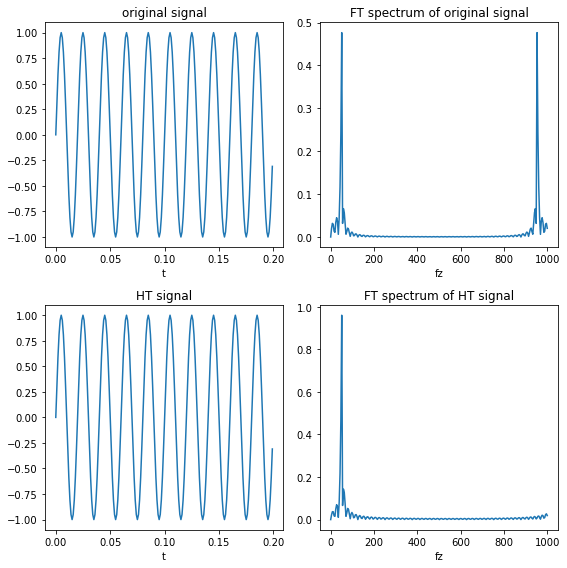

In [26]:
import numpy as np
from scipy.signal import hilbert
# import nextpow2
# from obspy.signal.util import nextpow2
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

def nextpow2(n):
    '''
    求最接近数据长度的2的整数次方
    An integer equal to 2 that is closest to the length of the data
    
    Eg: 
    nextpow2(2) = 1
    nextpow2(2**10+1) = 11
    nextpow2(2**20+1) = 21
    '''
    return np.ceil(np.log2(np.abs(n))).astype('long')

fs = 1000
N = 200
f = 50
t = np.arange(N) / fs
x = np.sin(2 * np.pi * f * t)

xh = hilbert(x)
xi = np.imag(xh)
assert np.sum(x * xi) < 1e-12, 'HT(signal) should be orthogonal to original signal'

xih = hilbert(xi)
xii = np.imag(xih)
assert max(x + xii) < 1e-12, 'HT(HT(signal)) should be negative of original signal'

NFFT = 2**nextpow2(N)
f = fs * np.linspace(0,1,NFFT)
X = fft(x, NFFT) / N
XH = fft(xh, NFFT) / N
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.plot(t, x)
plt.xlabel('t')
plt.title('original signal')
plt.subplot(2,2,3)
plt.plot(t, x)
plt.xlabel('t')
plt.title('HT signal')
plt.subplot(2,2,2)
plt.plot(f, abs(X))
plt.xlabel('fz')
plt.title('FT spectrum of original signal')
plt.subplot(2,2,4)
plt.plot(f, abs(XH))
plt.xlabel('fz')
plt.title('FT spectrum of HT signal')

plt.tight_layout()
plt.show()

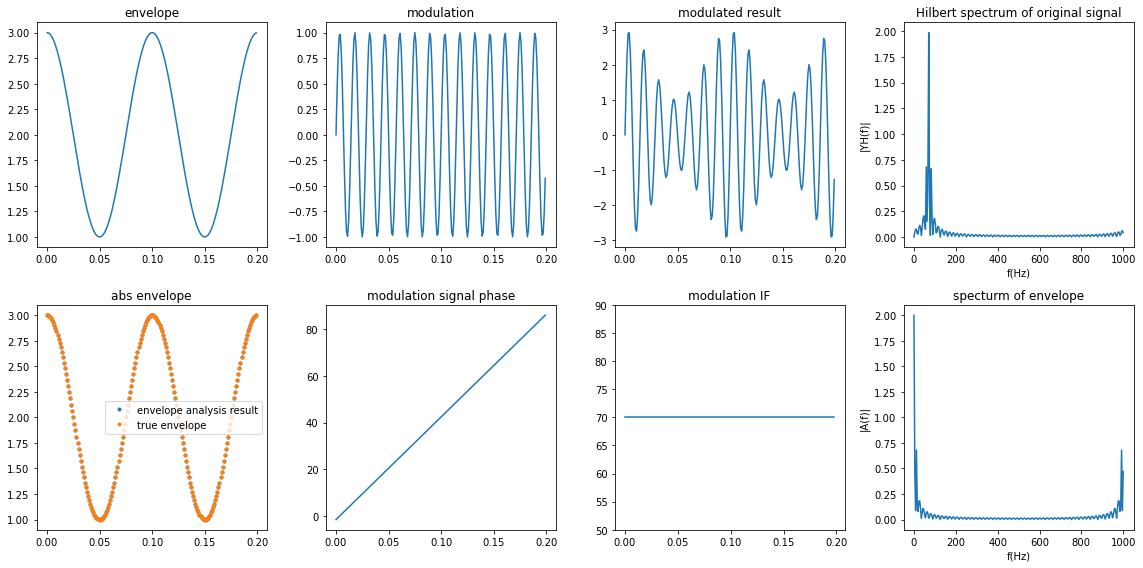

In [27]:
# 包络测试
fs = 1000
N = 200
t = np.arange(N) / fs

f1 = 10
f2 = 70

# a = np.cos(2*np.pi*f1*t) # 包络1
a = 2 + np.cos(2*np.pi*f1*t) # 包络2
# a = 1/(1+t**2*50) # 包络3

m = np.sin(2*np.pi*f2*t) # 调制信号
y = a*m # 信号调制结果

plt.figure(figsize=(16, 8))
plt.subplot(241)
plt.plot(t, a)
plt.title('envelope')
plt.subplot(242)
plt.plot(t, m)
plt.title('modulation')
plt.subplot(243)
plt.plot(t, y)
plt.title('modulated result')

yh = hilbert(y)
aabs = abs(yh) # 包络的绝对值
aangle = np.unwrap(np.angle(yh)) # 包络的相位
af = np.diff(aangle)/2/np.pi # 包络的瞬时频率，差分代替微分计算

NFFT = 2**nextpow2(N)
# NFFT = 2**nextpow2(1024*4) # 改善栅栏效应
f = fs*np.linspace(0,1,NFFT)
YH = fft(yh, NFFT)/N # Hilbert变换复信号的频谱
A = fft(aabs, NFFT)/N # 包络的频谱
plt.subplot(245)
plt.plot(t, aabs, '.', label='envelope analysis result')
plt.plot(t, a, '.', label='true envelope')
plt.title('abs envelope')
plt.legend()

plt.subplot(246)
plt.plot(t, aangle)
plt.title('modulation signal phase')

plt.subplot(247)
plt.plot(t[0:-1], af*fs)
plt.title('modulation IF')
plt.ylim([50, 90])

plt.subplot(244)
plt.plot(f,abs(YH))
plt.title('Hilbert spectrum of original signal')
plt.xlabel('f(Hz)')
plt.ylabel('|YH(f)|')

plt.subplot(248)
plt.plot(f,abs(A))
plt.title('specturm of envelope')
plt.xlabel('f(Hz)')
plt.ylabel('|A(f)|')

plt.tight_layout()
plt.show()